<a href="https://colab.research.google.com/github/taeyoni/today-I-learned/blob/main/python24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

question = pd.read_csv('/content/drive/MyDrive/Dart_b-data/schema.csv')
question.shape

(290, 3)

In [4]:
#데이터사이언스 직업을 찾는데 가장 고려해야할 요소는?
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [21]:
mcq = pd.read_csv('/content/drive/MyDrive/Dart_b-data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

In [22]:
#jfdf is not defined ; 뭐가 문제인가.
#jfdf = pd.read_csv('/content/drive/MyDrive/Dart_b-data/multipleChoiceResponses.csv')
jfdf.plot(kind='bar', figsize=(18,6),
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcc in position 122056: invalid continuation byte

<Axes: xlabel='count', ylabel='UniversityImportance'>

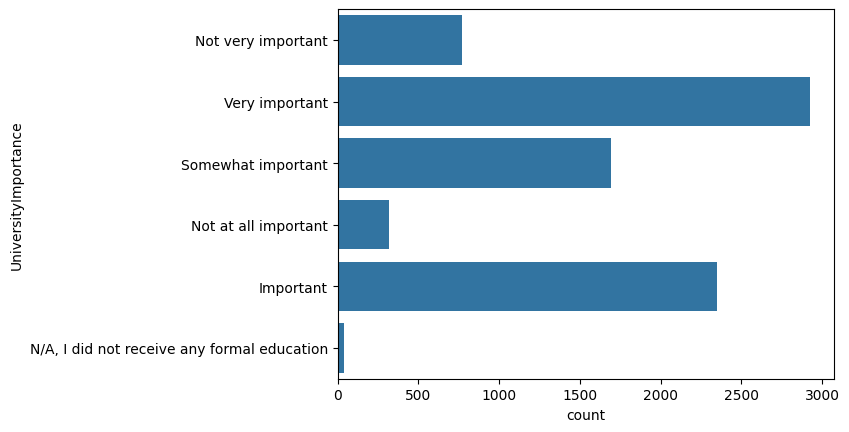

In [8]:
#데이터 사이언티스트가 되기 위해 학위가 중요한가
sns.countplot(y='UniversityImportance', data=mcq)

In [10]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')

In [ ]:
#어디에서부터 데이터 사이언스를 시작해야 할까
mcq[mcq['FirstTrainingSelect'].notnull()].shape

<Axes: xlabel='count', ylabel='FirstTrainingSelect'>

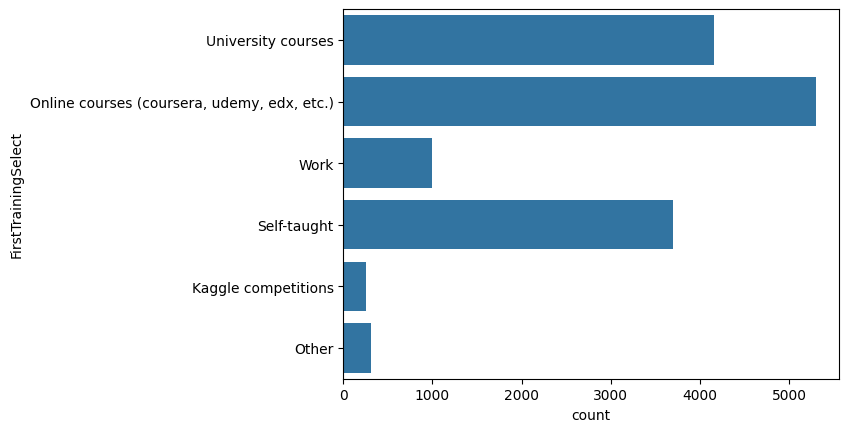

In [11]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

<Axes: xlabel='count', ylabel='ProveKnowledgeSelect'>

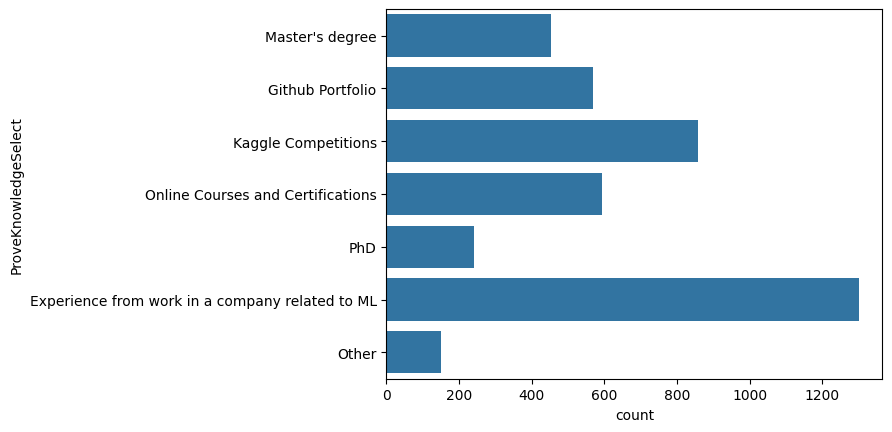

In [12]:
#데이터 사이언티스트 이력서에서 가장 중요한 것은?
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

In [13]:
#머신러닝 알고리즘을 위해 수학이 필요한가?
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [14]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

<Axes: xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

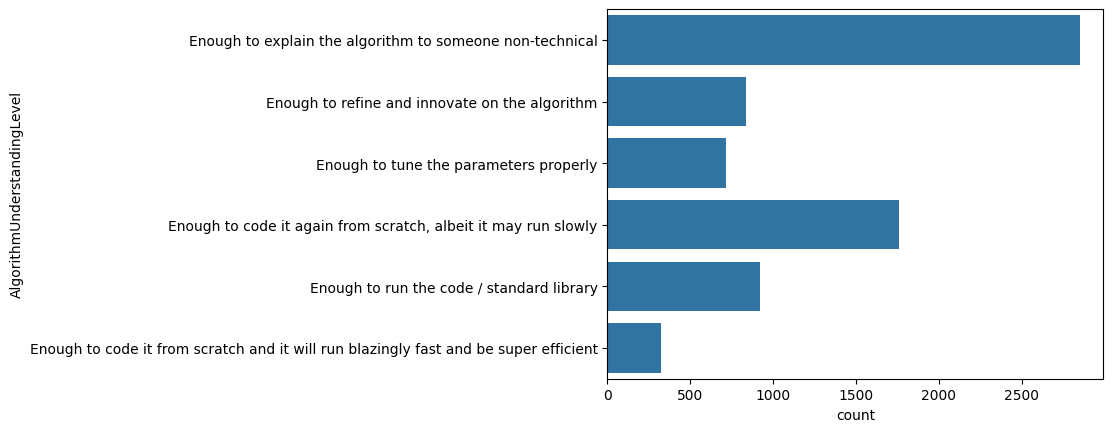

In [15]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

In [16]:
#어디에서 일을 찾아야 할까
#설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


<Axes: title={'center': 'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

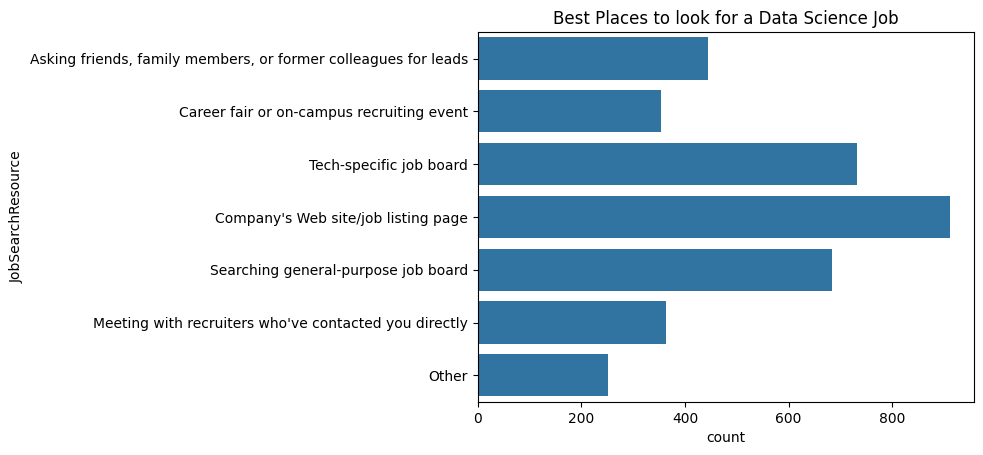

In [17]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

<Axes: title={'center': 'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

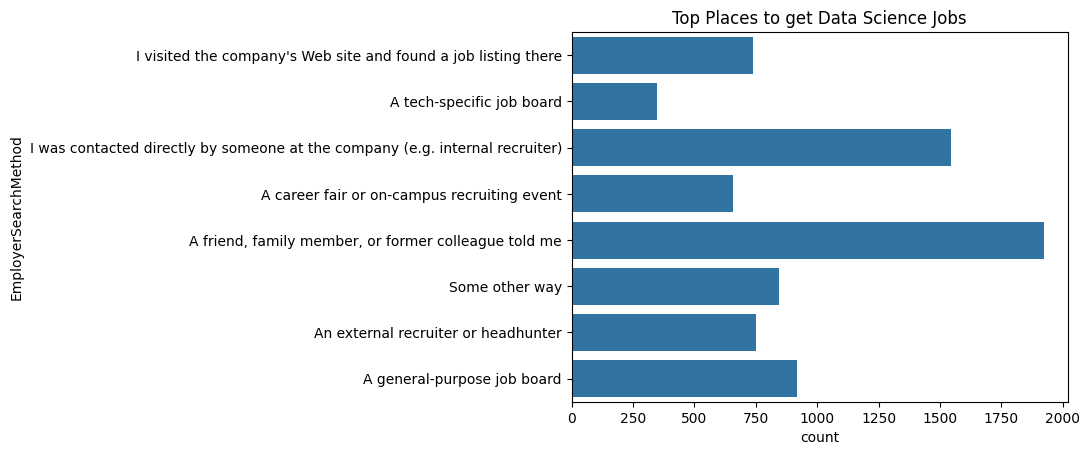

In [18]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

<Axes: title={'center': 'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

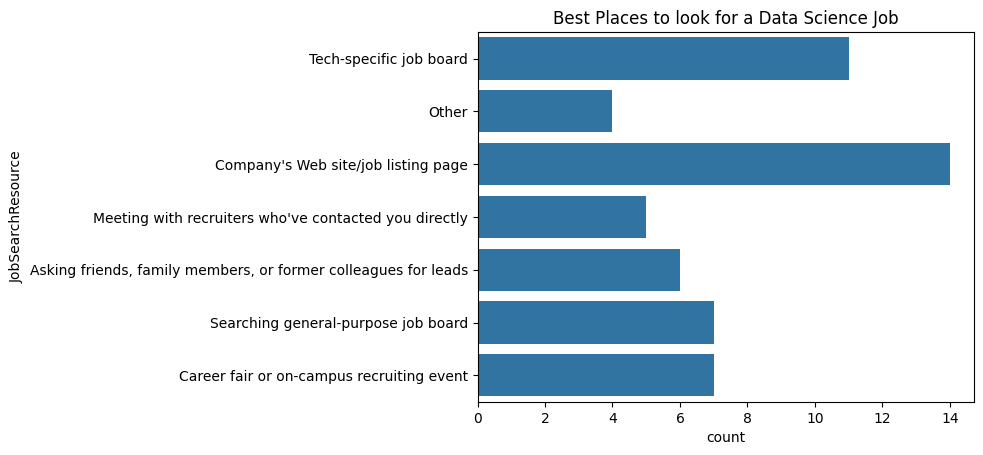

In [19]:
#한국인
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

<Axes: title={'center': 'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

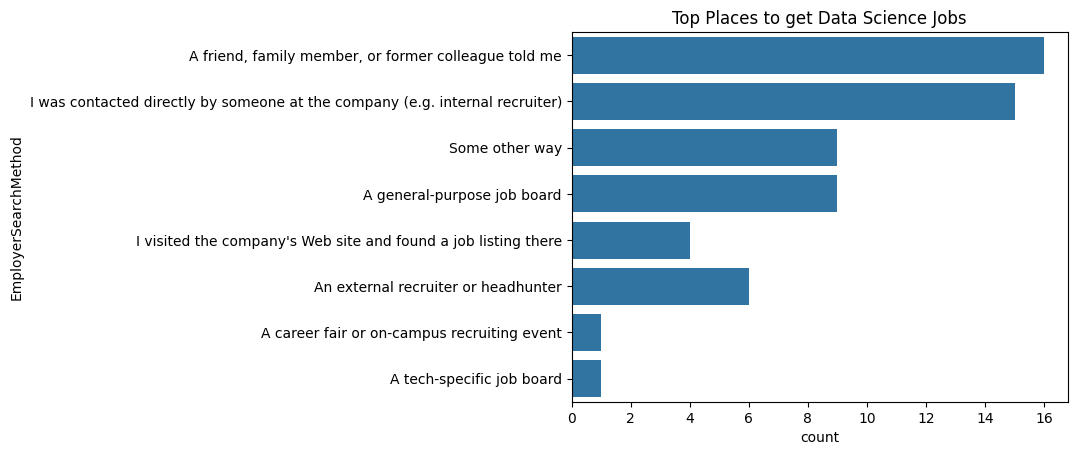

In [20]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)